![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.

### Get the data 

Use the jupyter file from the last lab (Customer Analysis Round 3)

### Complete the following task 

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

### 0. Coding Good Practices

In [20]:
# Firstly we open all libraries we are gonna use

# pandas for data manipulation and analysis.
import pandas as pd
# NumPy for mathematical operations
import numpy as np
# Plots visualizations, it serves as en extension of NumPy
import matplotlib.pyplot as plt
# Based on Matplot, high-level interface graphics
import seaborn as sns
#Stadistical functions
import scipy.stats as stats

# Lastly... no more warnings... HURRAY !!!!
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Opning the file
df = pd.read_csv('marketing_customer_analysis.csv')

# Sample visualization of our dataset
df.sample(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
8458,PN35535,California,4651.284290,No,Basic,College,2/25/11,Employed,F,98475,...,22,0,1,Personal Auto,Personal L1,Offer2,Web,552.000000,SUV,Medsize
736,HB85743,California,8838.085637,Yes,Basic,Bachelor,1/21/11,Employed,M,82664,...,10,3,9,Personal Auto,Personal L1,Offer2,Agent,133.425609,SUV,Medsize
8140,ZR22245,Washington,4605.036646,Yes,Basic,College,1/28/11,Medical Leave,F,22571,...,51,0,9,Personal Auto,Personal L3,Offer2,Web,302.400000,Four-Door Car,Large
873,FF22360,Washington,2687.314108,No,Basic,Doctor,1/30/11,Employed,F,82210,...,46,4,1,Personal Auto,Personal L2,Offer3,Call Center,51.961915,Four-Door Car,Medsize
8162,MX93069,Oregon,5073.282126,Yes,Extended,Doctor,1/30/11,Employed,M,57709,...,26,0,1,Personal Auto,Personal L3,Offer2,Branch,600.000000,SUV,Medsize


In [22]:
# We fix the column names (standarization)
df.columns = cc = [column.lower().replace(' ', '_') for column in df]

# Finally, we display the info to see our changes and each column datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

### 1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [23]:
# Simple NumPy options to select the desired columns
num = df.select_dtypes(include= np.number)
cat = df.select_dtypes(exclude=np.number)

In [24]:
num.sample(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
1678,7264.803903,12075,94,16,23,0,5,451.200000
5265,8007.399376,0,112,12,93,0,3,537.600000
5514,4815.851943,59438,124,33,55,0,1,562.667789
7639,2402.172069,43246,62,19,89,0,1,52.435202
3336,3265.156348,25820,82,10,69,0,1,393.600000


In [25]:
cat.sample(5)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
4985,EL77795,California,No,Extended,College,1/9/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Medsize
133,TQ13499,Arizona,No,Premium,College,1/2/11,Employed,M,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Small
2298,DV27428,Oregon,No,Basic,High School or Below,1/9/11,Employed,M,Rural,Single,Personal Auto,Personal L2,Offer3,Call Center,SUV,Medsize
4759,DS75515,California,No,Basic,Bachelor,2/1/11,Employed,M,Urban,Married,Personal Auto,Personal L2,Offer2,Agent,Two-Door Car,Large
3357,XC32316,Arizona,Yes,Extended,High School or Below,1/31/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L1,Offer1,Agent,SUV,Medsize


### 2. Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 

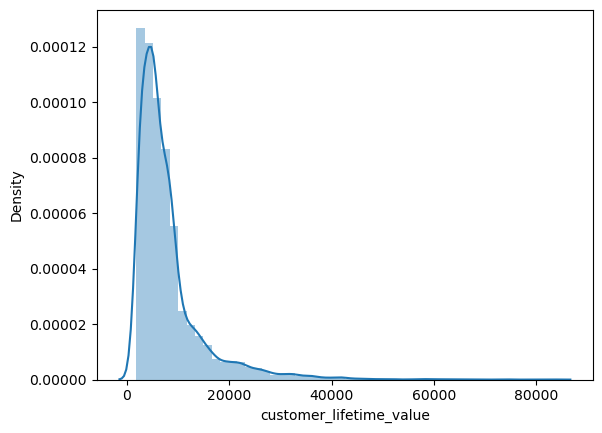

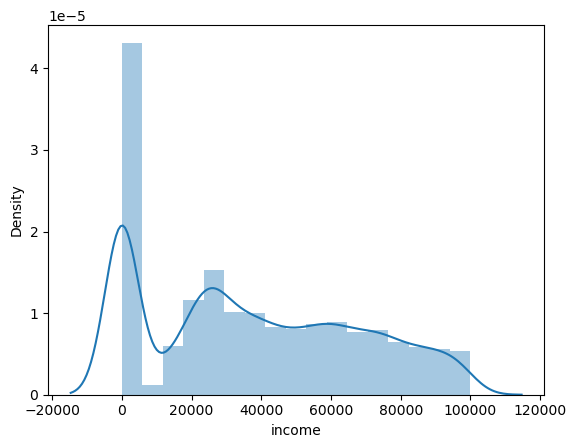

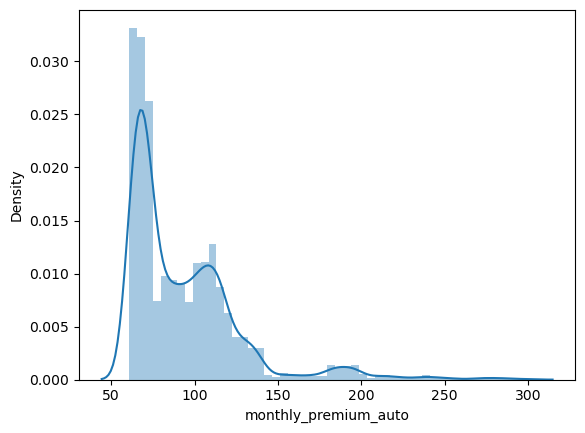

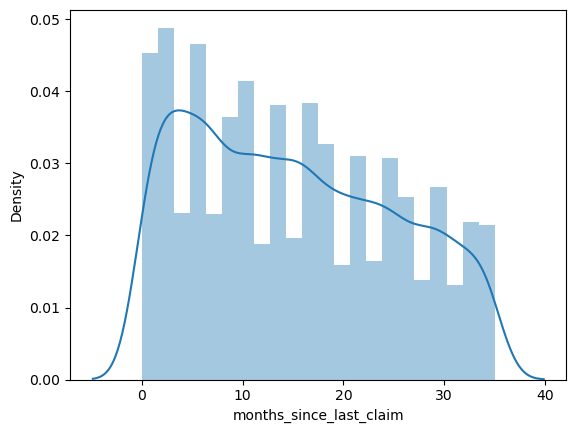

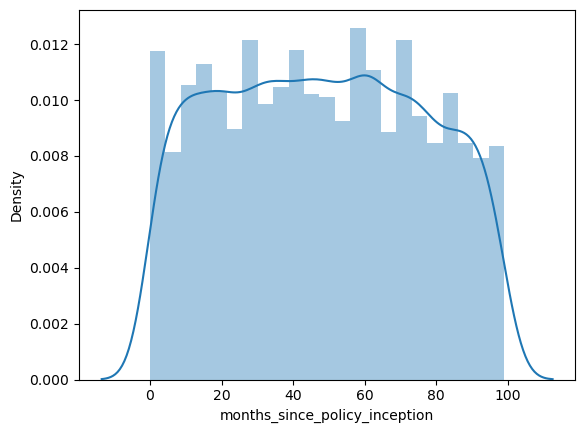

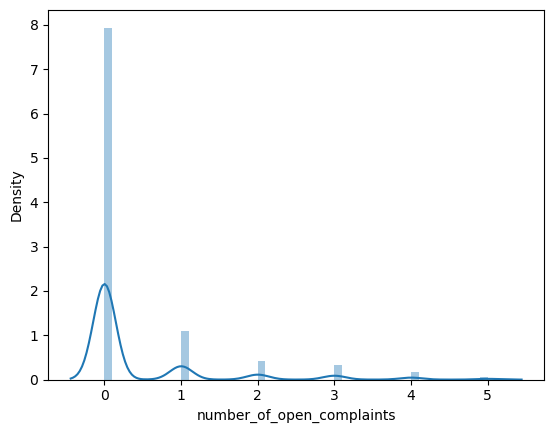

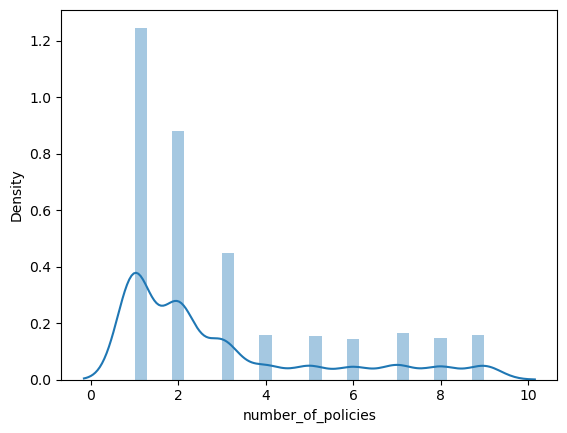

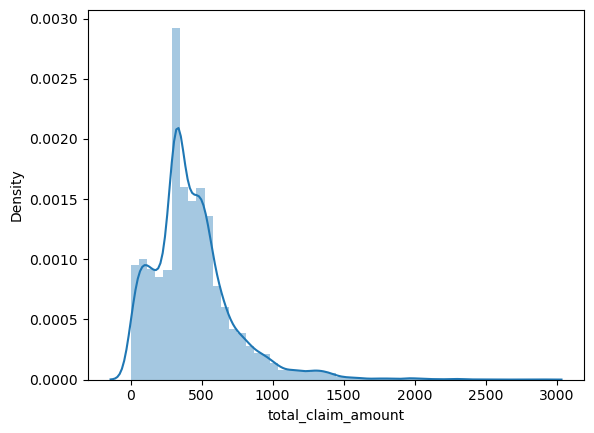

In [26]:
# Seaborn for distribution plots (only numerical)
for column in num:
    sns.distplot(num[column])
    plt.show()

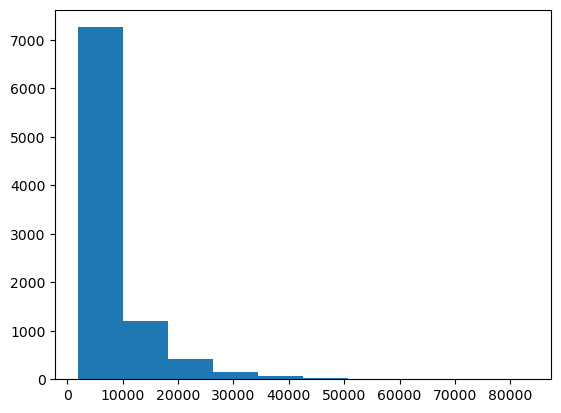

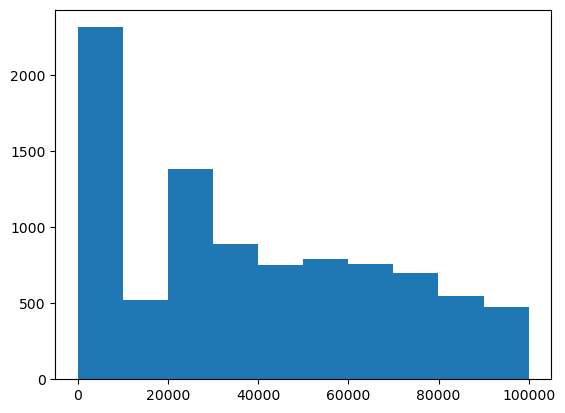

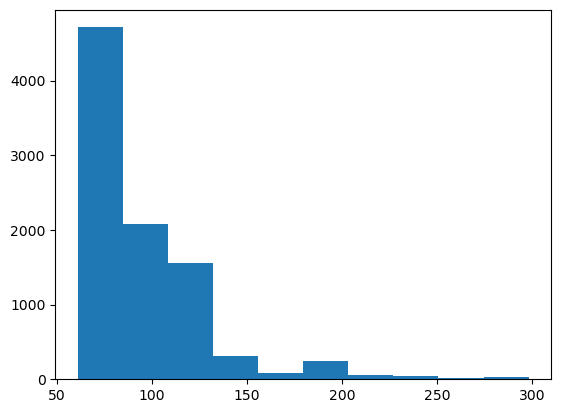

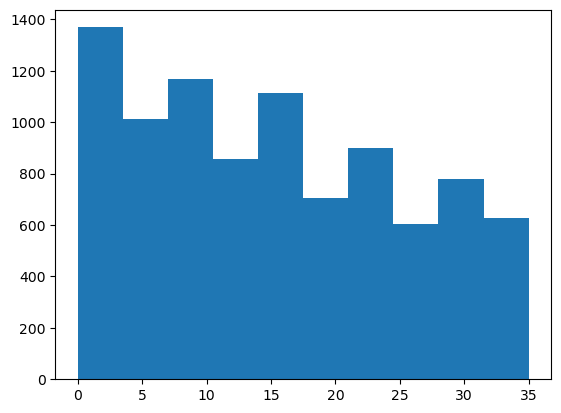

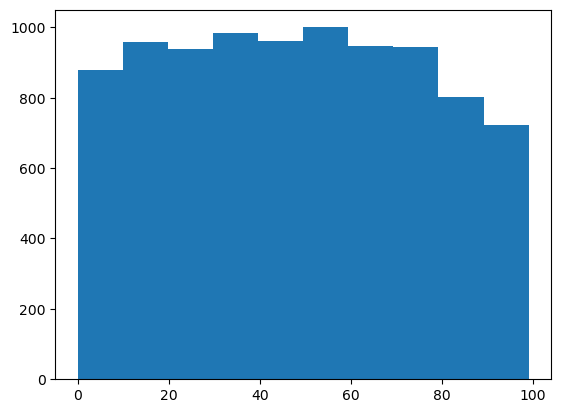

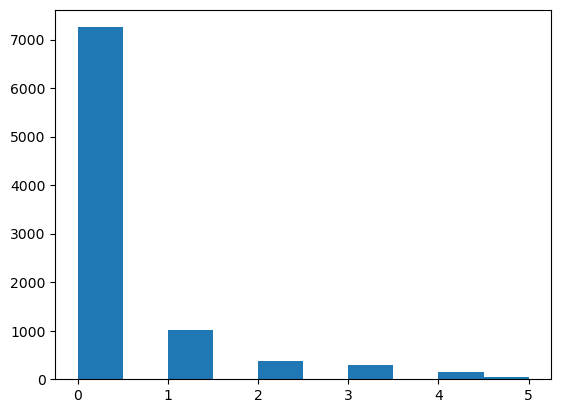

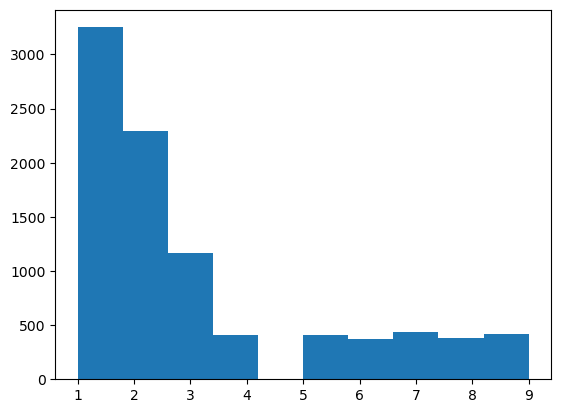

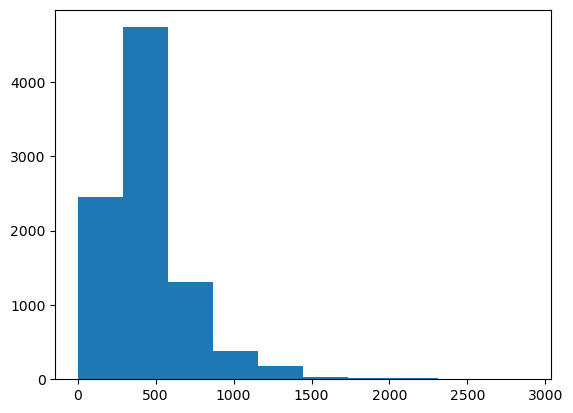

In [27]:
# Matplot for histograms
for column in num:
    plt.hist(num[column])
    plt.show()

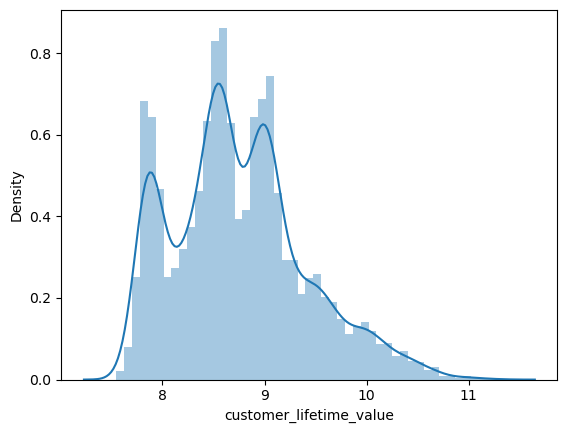

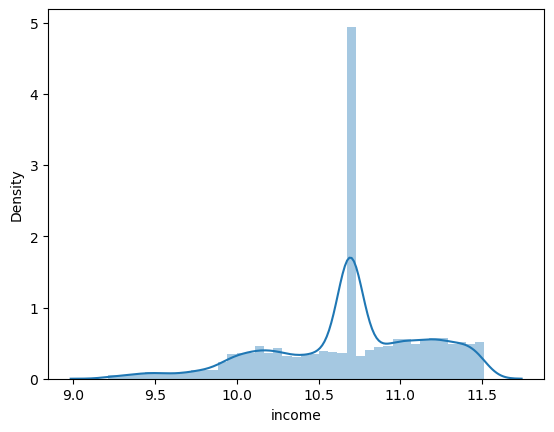

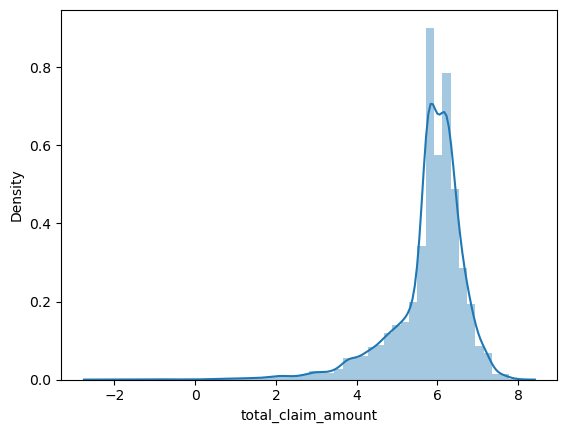

In [30]:
##### WORKING ON IT ######

# Normal distribution
# We drop the columns that contain discrete numbers
num_drop = num.drop(columns=['monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies'])

def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

for column in num_drop:
    num_drop[column] = list(map(log_transfom_clean, num_drop[column]))
    num_drop[column] = num_drop[column].fillna(np.mean(num_drop[column]))
    sns.distplot(num_drop[column])
    plt.show()

### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 

In [31]:
corr_data = num
correlations_matrix = corr_data.corr()
correlations_matrix[(correlations_matrix['total_claim_amount'] > .2) | (correlations_matrix['total_claim_amount'] < -.2)]['total_claim_amount']

customer_lifetime_value    0.226451
income                    -0.355254
monthly_premium_auto       0.632017
total_claim_amount         1.000000
Name: total_claim_amount, dtype: float64

### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

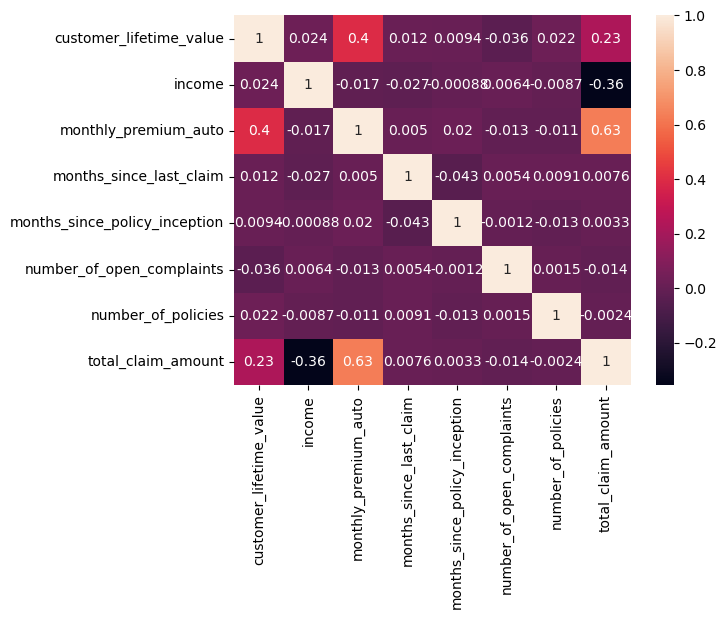

In [11]:
sns_plot = sns.heatmap(correlations_matrix, annot=True)
figure = sns_plot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)
plt.show()

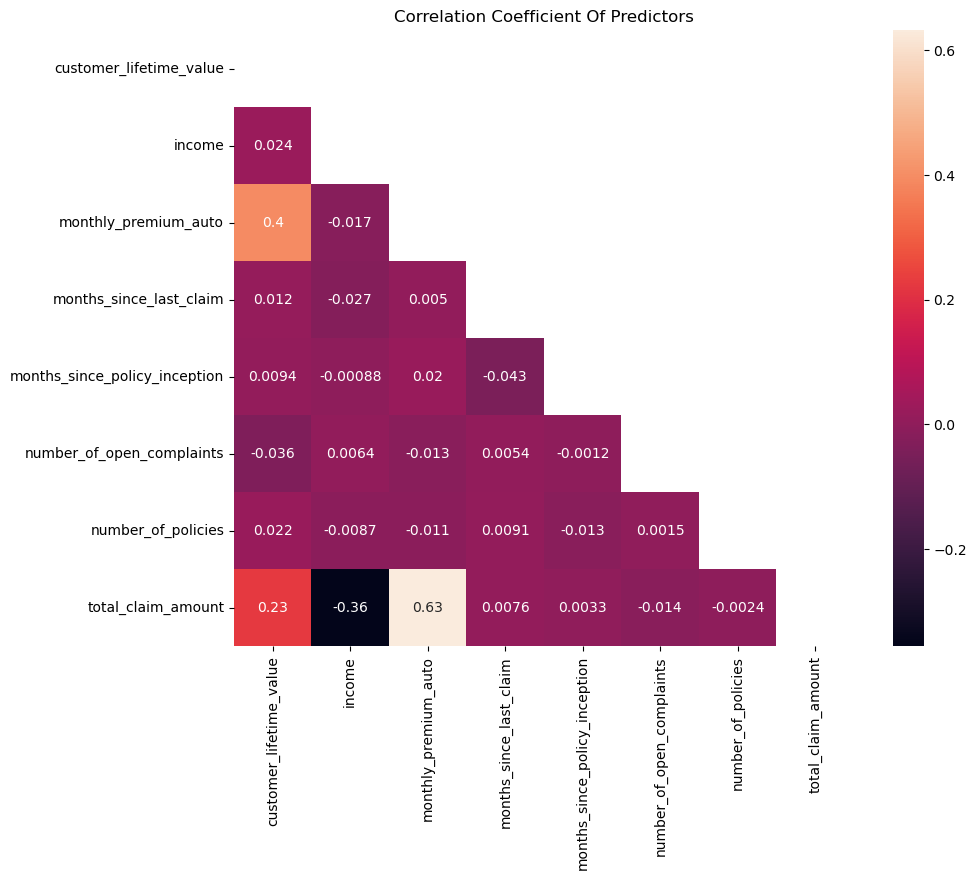

In [12]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

There are no features that show a correlation higher than 0.9